<a href="https://colab.research.google.com/github/Nagalakshmigodi/ml-1-Project/blob/main/Diabetic_medical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/diabetes.csv')


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

<Figure size 500x500 with 0 Axes>

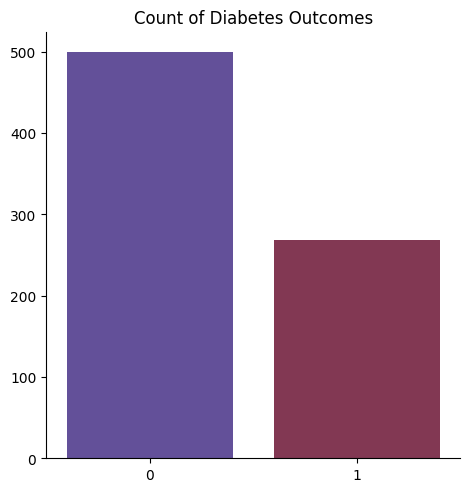

In [ ]:
plt.figure(figsize=(5,5))
sns.catplot(data=df,x='Outcome',kind='count',palette='twilight')
plt.title('Count of Diabetes Outcomes',loc='center')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

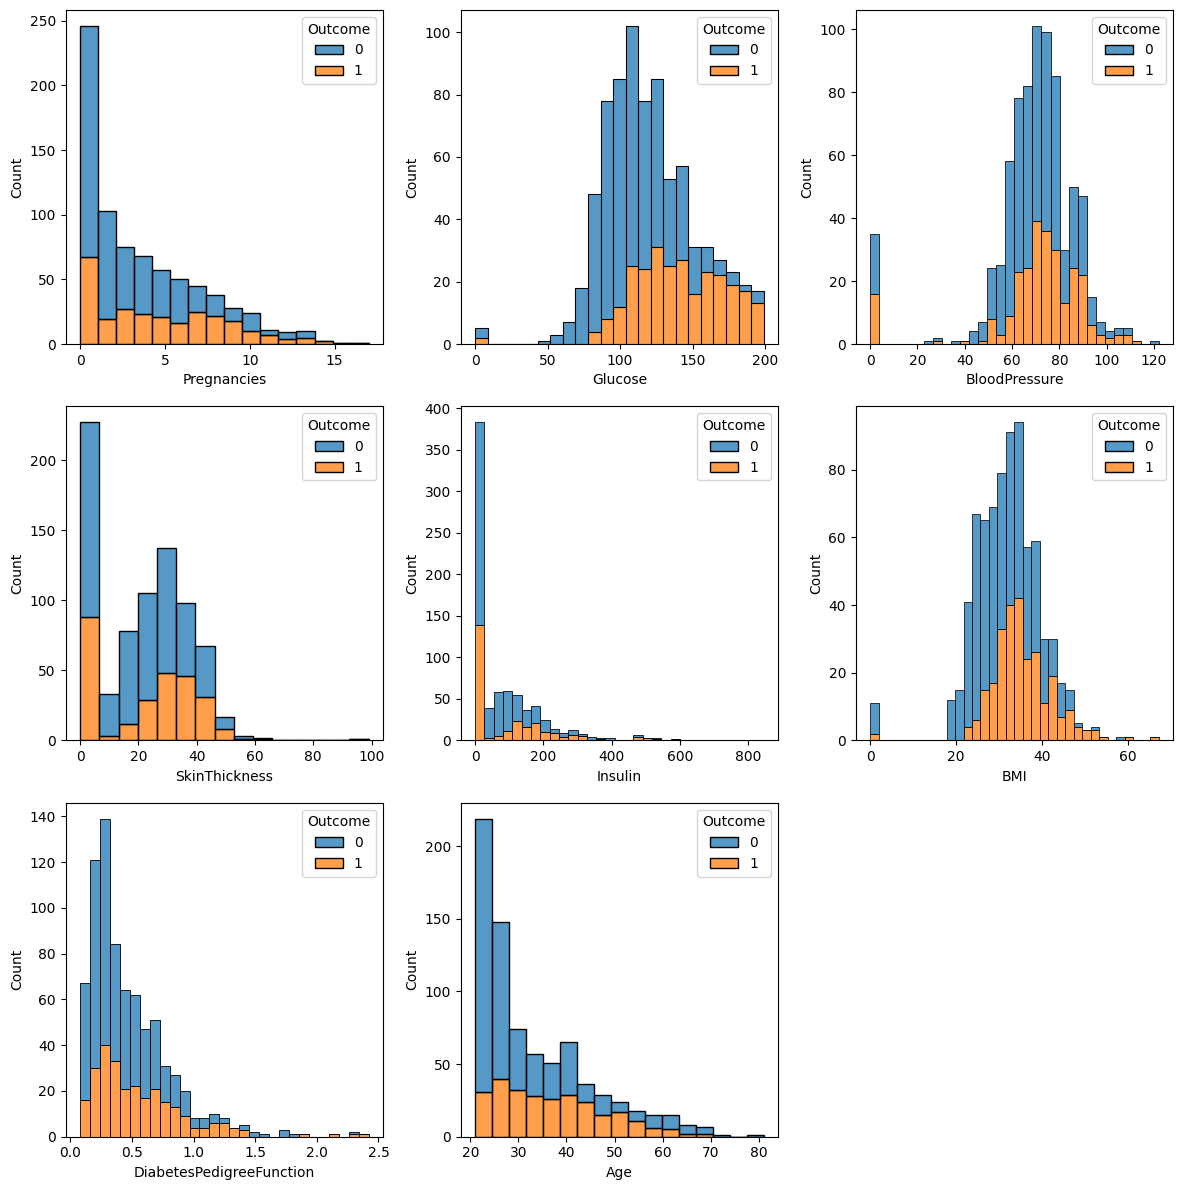

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,12))
i=0
for column in [ x for x in df.columns if x!='Outcome' ]:
    row=i//3
    col=i%3
    if col=='Glucose':
        sns.histplot(data=np.log2(df[column]),ax=axes[row,col],hue='Outcome',multiple='stack')
    else:
        sns.histplot(data=df,x=column,ax=axes[row,col],hue='Outcome',multiple='stack')
    i+=1
fig.delaxes(axes[2, 2])
plt.tight_layout()
plt.show();

In [ ]:
df.skew()

,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


In [ ]:
np.log2(df['Age']).skew()

0.6017461375371242

In [ ]:
df.kurtosis()

,0
Pregnancies,0.159220
Glucose,0.640780
BloodPressure,5.180157
SkinThickness,-0.520072
Insulin,7.214260
BMI,3.290443
DiabetesPedigreeFunction,5.594954
Age,0.643159
Outcome,-1.600930


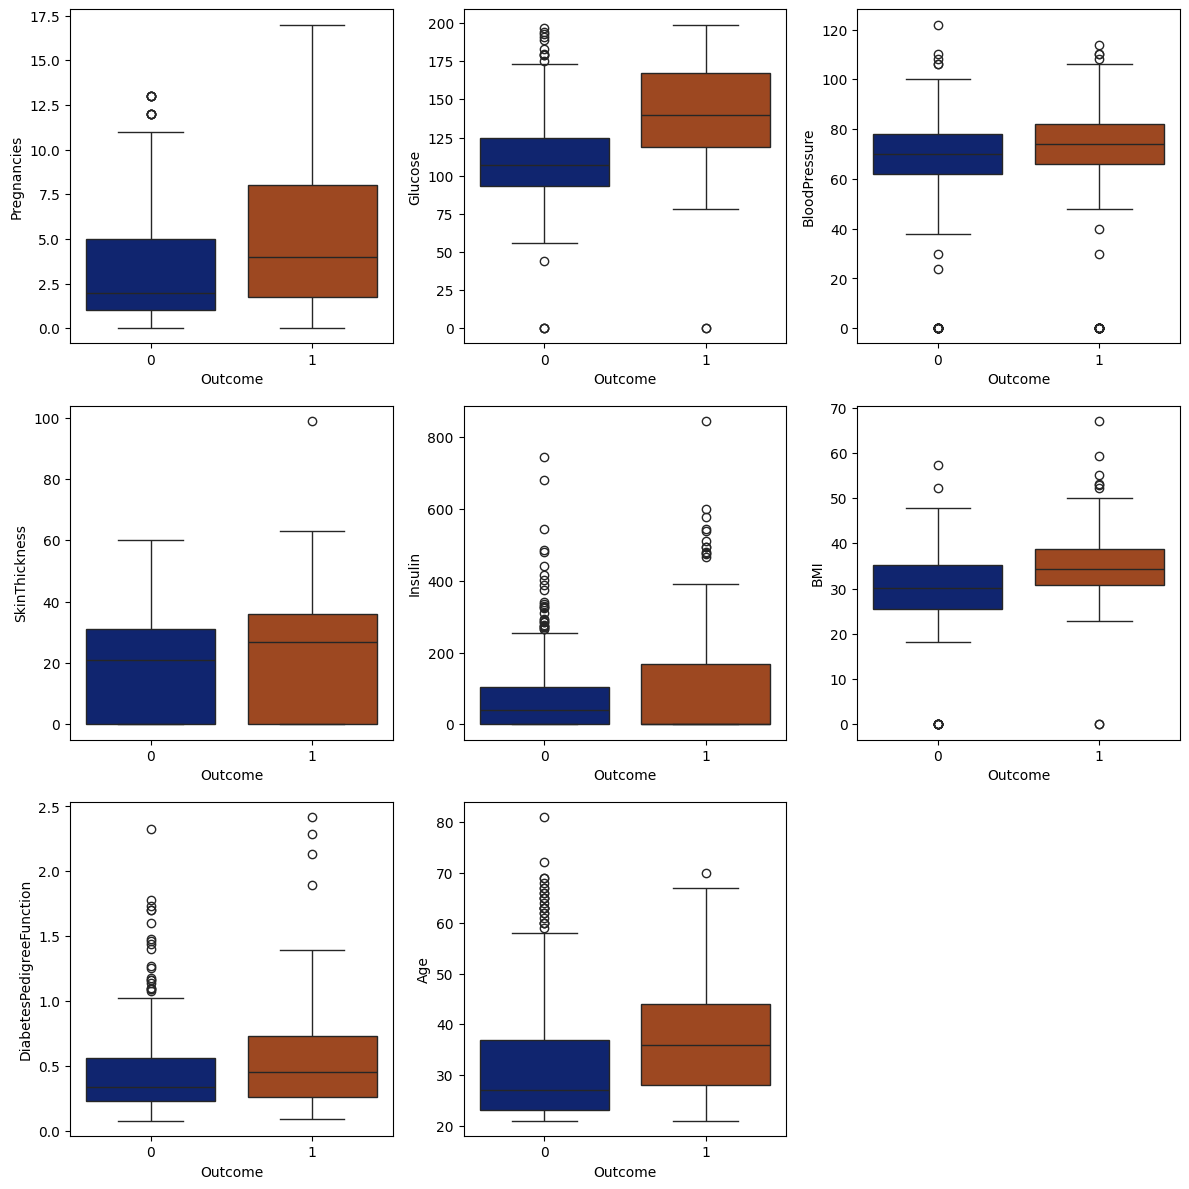

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,12))
i=0
for column in [ x for x in df.columns if x!='Outcome' ]:
    row=i//3
    col=i%3
    sns.boxplot(data=df,y=column,x='Outcome',ax=axes[row,col],palette='dark')
    i+=1
fig.delaxes(axes[2, 2])
plt.tight_layout()
plt.show();

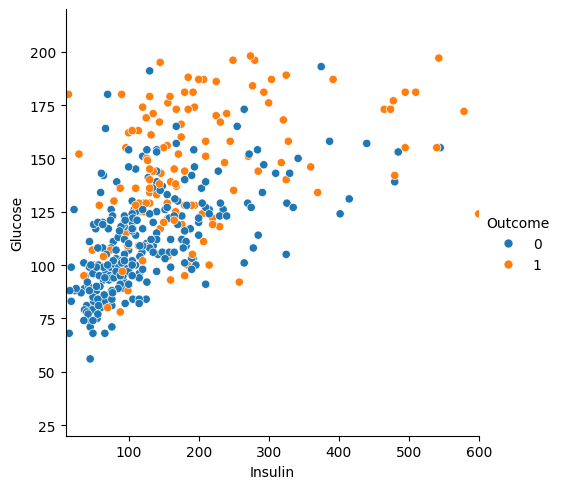

In [ ]:
sns.relplot(data=df,y='Glucose',x='Insulin',hue='Outcome')
plt.xlim(10,600)
plt.ylim(20,220);

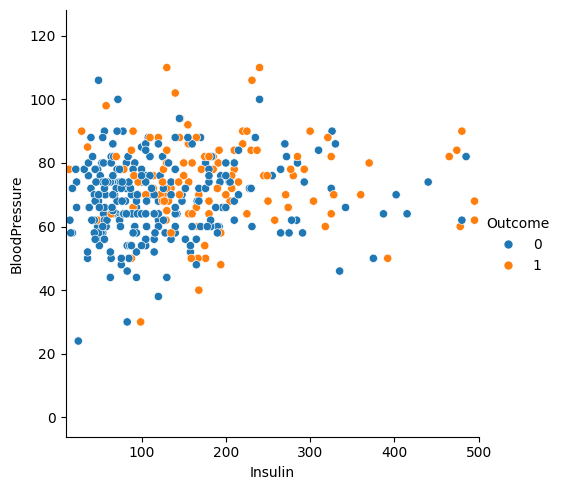

In [ ]:
sns.relplot(data=df,y='BloodPressure',x='Insulin',hue='Outcome')
plt.xlim(10,500);

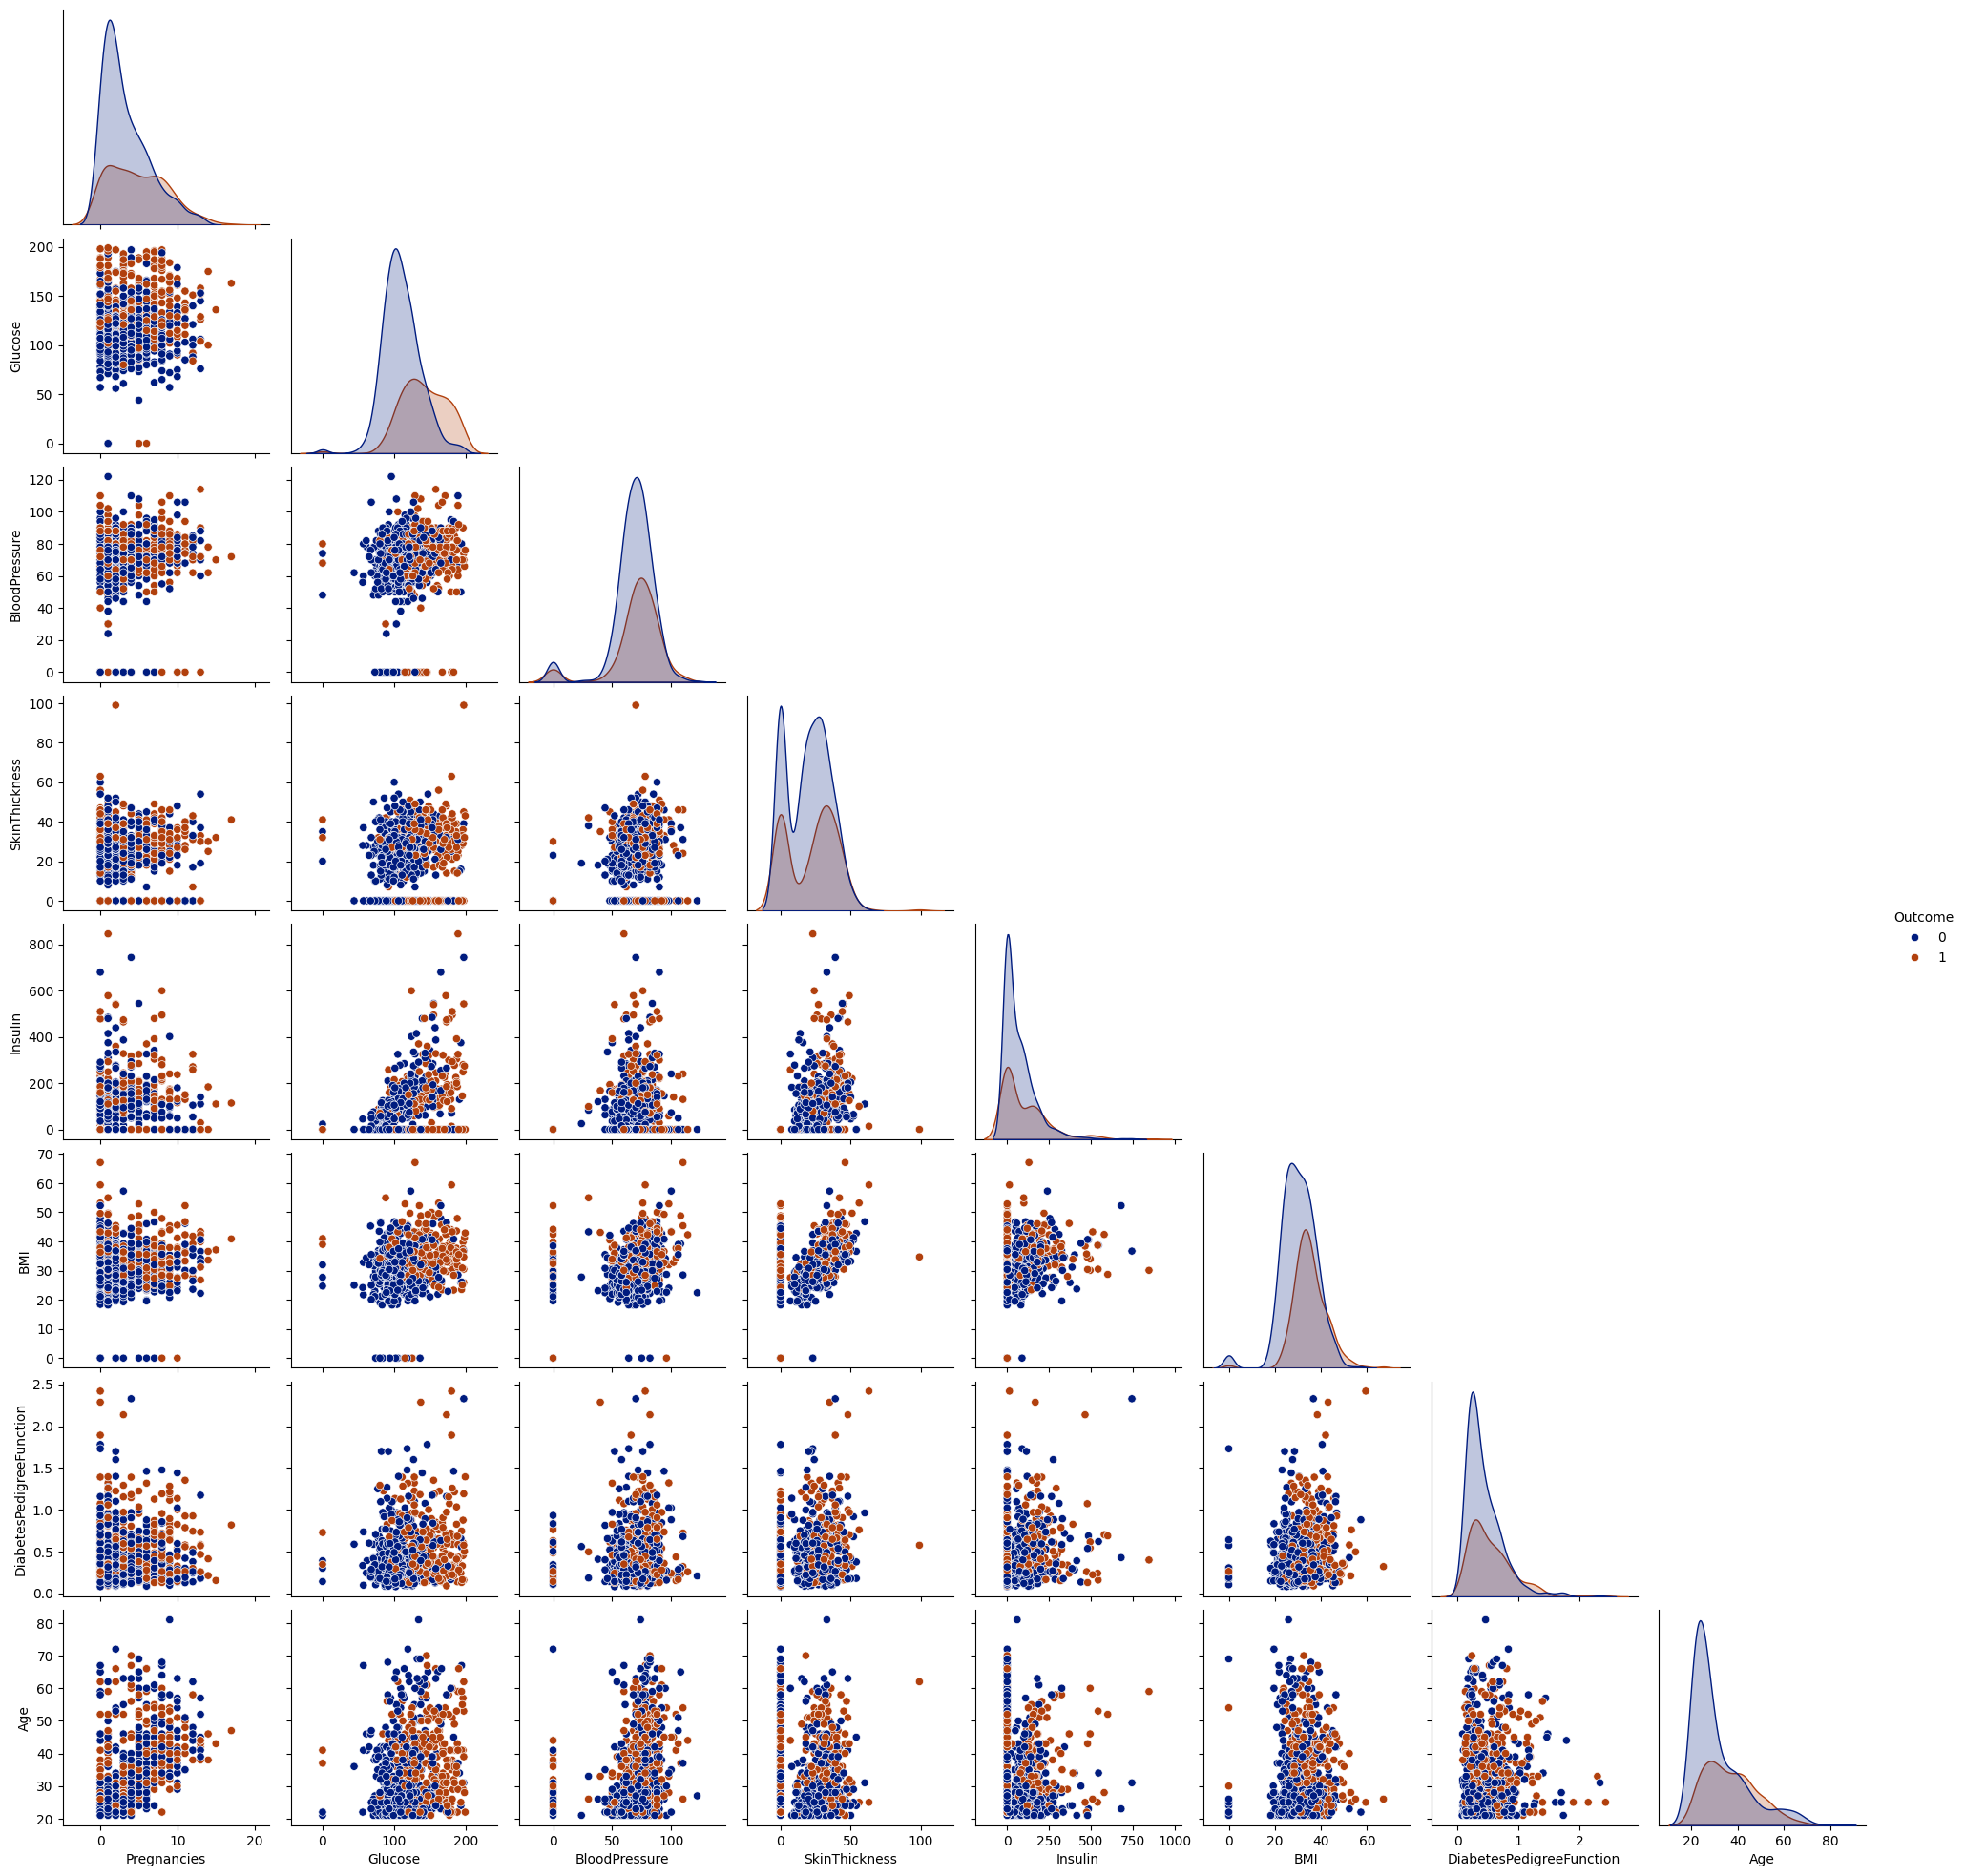

In [ ]:
sns.pairplot(data=df,hue='Outcome',corner=True,palette='dark')
sns.despine()

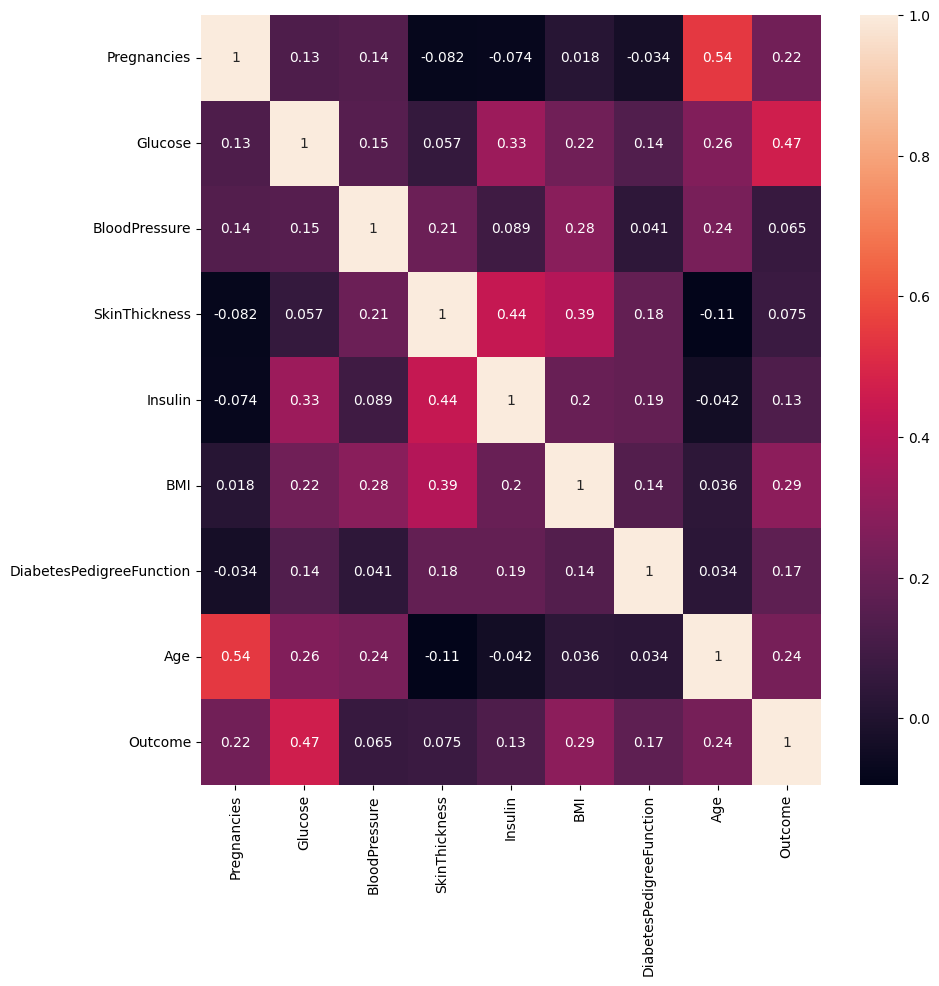

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,robust=True);

In [ ]:
corr=df.corr()
for i in range(len(df.columns)):
    corr.iat[i,i]=0
corr.idxmax()

,0
Pregnancies,Age
Glucose,Outcome
BloodPressure,BMI
SkinThickness,Insulin
Insulin,SkinThickness
BMI,SkinThickness
DiabetesPedigreeFunction,Insulin
Age,Pregnancies
Outcome,Glucose


In [ ]:
corr.max()

,0
Pregnancies,0.544341
Glucose,0.466581
BloodPressure,0.281805
SkinThickness,0.436783
Insulin,0.436783
BMI,0.392573
DiabetesPedigreeFunction,0.185071
Age,0.544341
Outcome,0.466581


In [ ]:
df.query('SkinThickness>80')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [ ]:
df.query('Insulin >=600')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
584,8,124,76,24,600,28.7,0.687,52,1


In [ ]:
df.query('Glucose <=0 | BMI<=0 ')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
75,1,0,48,20,0,24.7,0.140,22,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
371,0,118,64,23,89,0.0,1.731,21,0


In [ ]:
mean_glucose=df[df['Glucose']>0]['Glucose'].mean().astype(int)
mean_bmi=df[df['BMI']>0]['BMI'].mean().astype(int)
print(mean_bmi,mean_glucose)

df['BMI']=df['BMI'].replace(0,mean_bmi)
df['Glucose']=df['Glucose'].replace(0,mean_glucose)

df=df[(df['Insulin']<=600 )& (df['SkinThickness']<80)]

32 121


In [ ]:
#train test split

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
X=df.drop(columns='Outcome')
Y=df['Outcome']
from sklearn.model_selection import StratifiedShuffleSplit
ssp=StratifiedShuffleSplit(n_splits=5,random_state=22)
train_index,test_index=next(StratifiedShuffleSplit(test_size=0.25,random_state=22).split(X,Y))
X_train,X_test=X.loc[train_index,:],X.loc[test_index,:]
y_train,y_test=Y.loc[train_index],Y.loc[test_index]

In [ ]:
#Model**
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score
lr=LogisticRegression(max_iter=500,random_state=23,C=1,tol=0.0001,penalty=None,solver='lbfgs')
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(lr.score(X_train,y_train)),
print(lr.score(X_test,y_test))

[[114  10]
 [ 31  36]]
0.7696335078534031
0.7853403141361257


In [ ]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7853403141361257
0.6371681415929203
0.5373134328358209
0.782608695652174


In [ ]:
params={'C':[0.01,0.2,0.1,1,10,100],
       'tol':[0.0001,0.001,0.001,0.1],
        'max_iter':[100,200,500,1000],
        'penalty':['l1','l2', 'elasticnet'],
        'class_weight':['balanced',None]}
gv=GridSearchCV(estimator=LogisticRegression(),param_grid=params,cv=ssp,n_jobs=-1,verbose=True)
gv.fit(X,Y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=22, test_size=None,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.2, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.0001, 0.001, 0.001, 0.1]},
             verbose=True)